In [1103]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [1104]:
def read_data():
    ''' reading data function but without hkl and everything of hkl file'''
    with open("data_storage.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        first_sample = data[0]
        name = first_sample["name"]
        path = first_sample["data"]["path"] 
        kalpha1 = first_sample["data"]["kalpha1"][0]
        kalpha2 = first_sample["data"]["kalpha2"][0]
        theta_start = first_sample["data"]["theta_start"][0]
        theta_stop = first_sample["data"]["theta_stop"][0]
        uvw_xy = first_sample["data"]["uvw_xy"] 
        start_step_end = first_sample["data"]["start_step_end"] 
        counts = json.loads(first_sample["data"]["counts"] )
        counts_bac = json.loads(first_sample["data"]["counts_bac"])
        hkl_plus = first_sample["data"]["hkl"][0]

    return uvw_xy,kalpha1,kalpha2,theta_start,theta_stop,path,counts,start_step_end,counts_bac,name,hkl_plus

In [1105]:
def read_data_of_hkl(hkl_plus):
    '''function reading data hkl and everything of hkl file'''
    h = hkl_plus['h']
    k = hkl_plus['k']
    l = hkl_plus['l']
    mult = hkl_plus['mult']
    sinT_lamb = hkl_plus['sinT_lamb']
    two_theta = hkl_plus['tt']
    fwhm = hkl_plus['fwhm']
    f2 = hkl_plus['f2']
    sf2 = hkl_plus['sf2']
    return h,k,l,mult,sinT_lamb,two_theta,fwhm,f2,sf2

In [1106]:
def plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop,on):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)
    x = np.arange(theta_start, theta_stop, N)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, counts, label="Counts (sample)", color="blue")
    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    if on:
        plt.plot(x, counts_bac, label="Counts (background)", color="orange")
    plt.legend()
    plt.show()

In [1107]:
def plot_with_theta_sample(counts,name,theta_start,theta_stop,two_theta):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)
    x = np.arange(theta_start, theta_stop, N)
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, counts, label="Counts (sample)", color="blue")
    for i in range(len(two_theta)):
        plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
    plt.xlabel("2Theta")
    plt.ylabel("Counts")
    plt.title(f"Sample of {name} ")
    plt.legend()
    plt.show()


In [1108]:
def checking_part_of_plot(counts,theta_start,theta_stop,two_theta,a):
    step = len(counts)
    N = ((theta_stop - theta_start)/step)   
    x = np.arange(theta_start, theta_stop, N)
    range_of_part = [0]
    k = 1
    while range_of_part[-1]<len(x)-a:
        range_of_part.append(k*a)
        k+=1
    # range_of_part = [0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000]
    # print(range_of_part)
    for j in range(len(range_of_part)-1):
        for i in range(len(two_theta)):
            if two_theta[i] < x[range_of_part[j+1]] and two_theta[i] > x[range_of_part[j]]:
                plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
        plt.plot(x[range_of_part[j]:range_of_part[j+1]],counts[range_of_part[j]:range_of_part[j+1]],color='green')
        # plt.plot(x[range_of_part[j]:range_of_part[j+1]:2],counts[range_of_part[j]:range_of_part[j+1]:2])
        plt.scatter(x[range_of_part[j]:range_of_part[j+1]],counts[range_of_part[j]:range_of_part[j+1]],color='orange', linestyle='--', linewidth=0.5)
        plt.show()
      
    for i in range(len(two_theta)):
            if two_theta[i] < x[-1] and two_theta[i] > x[3000]:
                plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
    plt.plot(x[3000:],counts[3000:])
    plt.scatter(x[3000:],counts[3000:],color='orange', linestyle='--', linewidth=0.5)
    plt.show()
   

In [1109]:
uvw_xy, kalpha1,kalpha2,theta_start,theta_stop,path, counts, start_step_end, counts_bac,name,hkl_plus= read_data()
h,k,l,mult,sinT_lamb,two_theta,fwhm,f2,sf2 = read_data_of_hkl(hkl_plus)
# plot_sample__bac(counts,counts_bac,name,theta_start,theta_stop,True)
# checking_part_of_plot(counts,theta_start,theta_stop,two_theta)




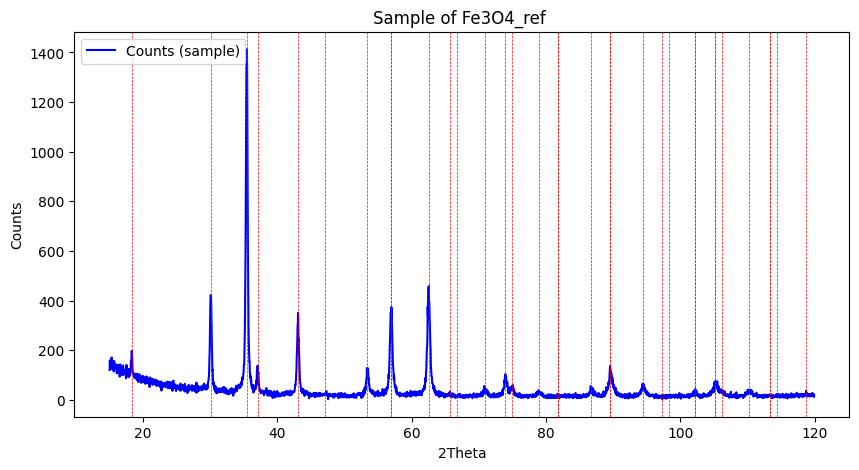

In [1110]:
plot_with_theta_sample(counts,name,theta_start,theta_stop,two_theta)


In [1111]:
def delete_bac(counts,counts_bac):
    """ function to subtract background """
    only_counts=np.zeros(len(counts))
    for i in range(len(counts)):
        only_counts[i] = abs(counts[i]-counts_bac[i])
    return only_counts


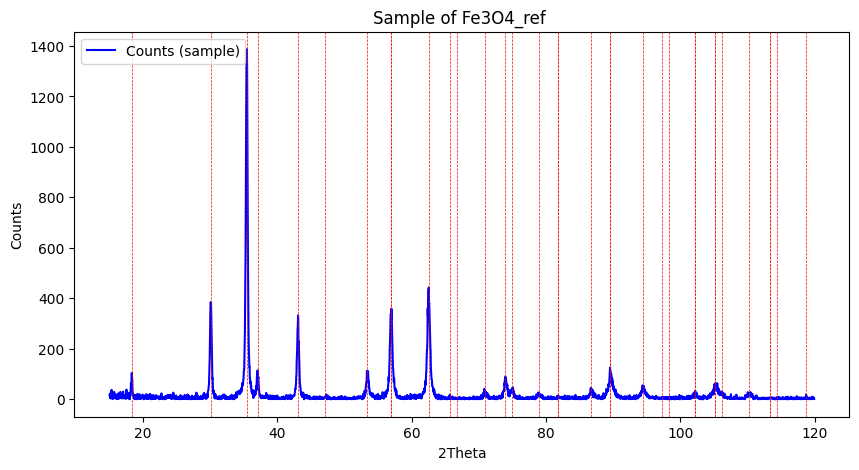

In [1112]:

only_counts = delete_bac(counts,counts_bac)

# plot_sample__bac(only_counts,counts_bac,name,theta_start,theta_stop,False)
plot_with_theta_sample(only_counts,name,theta_start,theta_stop,two_theta)
# checking_part_of_plot(only_counts,theta_start,theta_stop,two_theta,100)



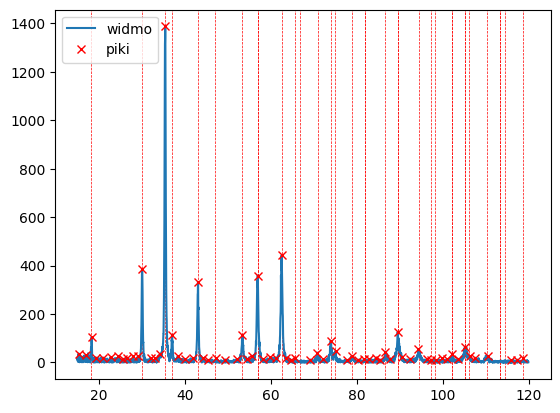

69
[np.float64(15.303818375471039), np.float64(17.007825306473592), np.float64(18.31088943018143), np.float64(19.4468940508498), np.float64(21.050665280028674), np.float64(22.721260310423336), np.float64(24.492091042641675), np.float64(25.56127186209426), np.float64(26.59704078093895), np.float64(27.93351680525468), np.float64(29.06952142592305), np.float64(30.071878444159847), np.float64(32.04318058002555), np.float64(33.179185200693915), np.float64(34.281777920754394), np.float64(35.451194442030655), np.float64(37.021553770601635), np.float64(38.324617894309476), np.float64(39.96180102409624), np.float64(41.933103159961945), np.float64(43.06910778063031), np.float64(44.27193620251447), np.float64(45.40794082318284), np.float64(47.279007257224855), np.float64(49.45078079673792), np.float64(52.05690904415359), np.float64(53.32656126725353), np.float64(54.36233018609823), np.float64(55.66539430980606), np.float64(56.968458433513895), np.float64(58.238110656613834), np.float64(59.8418818

In [ ]:
# wykrywanie pików
step = len(only_counts)
N = ((theta_stop - theta_start)/step)   
x = np.arange(theta_start, theta_stop, N)

from scipy.signal import find_peaks
peaks, dict = find_peaks(only_counts, height=10, distance=30)

for i in range(len(two_theta)):
        plt.axvline(x=two_theta[i], color='red', linestyle='--', linewidth=0.5)
plt.plot(x, only_counts, label='widmo')
plt.plot(x[peaks], only_counts[peaks], 'rx', label='piki')
plt.legend()
plt.show()
p,c=[],[]
print(len(peaks))
for i in peaks:
    p.append(x[i])
print(p)
print(two_theta)
print(len(two_theta))
print(dict)
# for i in two_theta:
#     c.append(only_counts[])
# print(c)

In [1114]:
max_count_difference = []
ind = []
for i in range(len(only_counts)-1):
    if abs(only_counts[i]-only_counts[i+1])>50:
        max_count_difference.append(abs(only_counts[i]-only_counts[i+1]))
        ind.append(i)
step = len(only_counts)
N = ((theta_stop - theta_start)/step)   
x = np.arange(theta_start, theta_stop, N)
print(max_count_difference)
print(ind)
print(x[ind])

[np.float64(68.0), np.float64(86.0), np.float64(54.0), np.float64(79.0), np.float64(52.0), np.float64(52.0), np.float64(52.0), np.float64(100.0), np.float64(89.0), np.float64(125.0), np.float64(229.0), np.float64(175.0), np.float64(178.0), np.float64(153.0), np.float64(80.0), np.float64(275.0), np.float64(159.0), np.float64(212.0), np.float64(156.0), np.float64(136.0), np.float64(79.0), np.float64(70.0), np.float64(52.0), np.float64(100.0), np.float64(52.0), np.float64(52.0), np.float64(55.0), np.float64(54.0), np.float64(107.0), np.float64(73.0), np.float64(64.0), np.float64(56.0), np.float64(66.0)]
[446, 447, 453, 454, 455, 600, 601, 603, 604, 605, 606, 607, 608, 609, 612, 613, 614, 615, 616, 617, 618, 619, 833, 841, 844, 1248, 1258, 1261, 1417, 1419, 1423, 1428, 1431]
[29.90481894 29.93823084 30.13870225 30.17211415 30.20552605 35.05025163
 35.08366354 35.15048734 35.18389924 35.21731114 35.25072304 35.28413494
 35.31754684 35.35095874 35.45119444 35.48460634 35.51801824 35.55143014

In [1115]:
# # To jest lista, więc weź pierwszy element
# entry = data[0]
# # Odczytanie nazwy
# print("Nazwa:", entry["name"])

# # Odczytanie ścieżki
# print("Ścieżka do pliku:", entry["data"]["path"])

# # Odczytanie theta_start
# print("Theta start:", entry["data"]["theta_start"][0])

# # Uwaga: counts i counts_bac to STRING z listą -> trzeba go sparsować
# counts = json.loads(entry["data"]["counts"])
# counts_bac = json.loads(entry["data"]["counts_bac"])

# print("Pierwsze 10 counts:", counts[:10])
# print("Pierwsze 10 counts_bac:", counts_bac[:10])